In [1]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import pandas as pd
import math
import os, shutil

## origin image

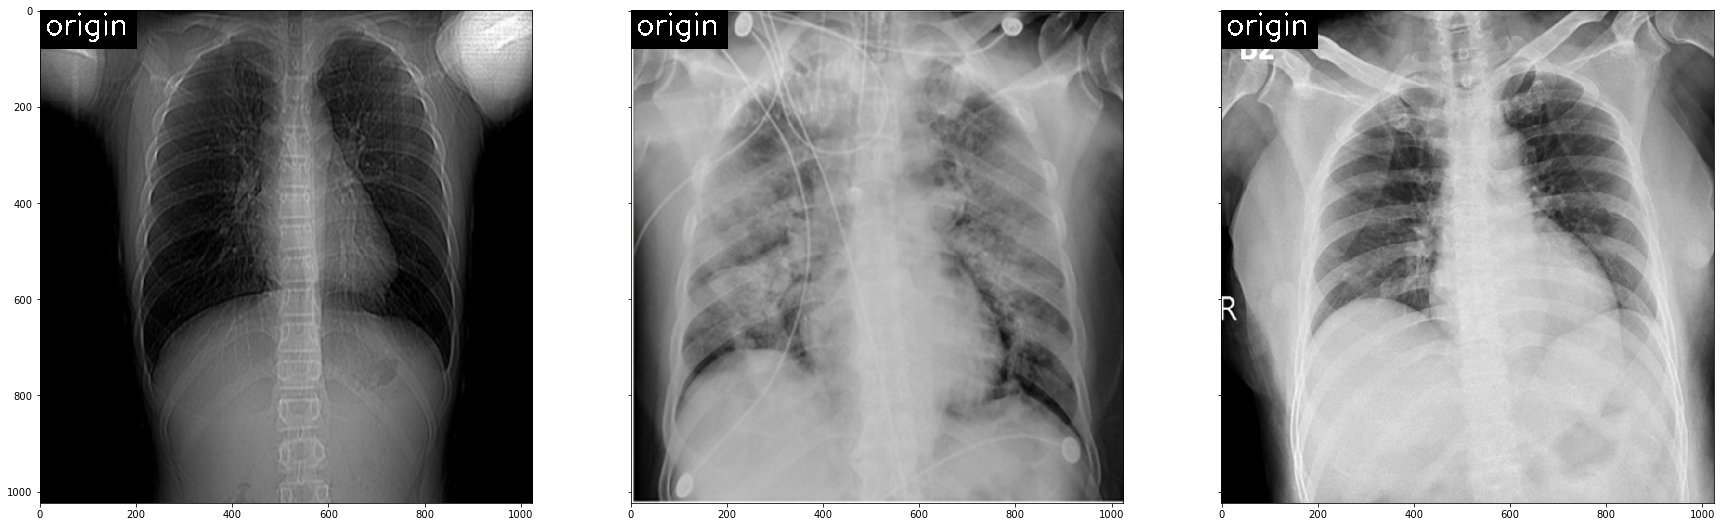

In [35]:
start = 10   # Starting index of images
num_img = 3 # Total number of images to show

fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
for q, file_path in enumerate(glob('C:/Users/28347/Documents/COVID-19/CO*')[start:start+num_img]):
    src_img = cv2.imread(file_path)
    cv2.rectangle(src_img, (0, 0), (200, 80), (0, 0, 0), -1)
    cv2.putText(src_img, "origin", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (255, 255, 255), 3)
    
    ax[q].imshow(src_img)

## gamma

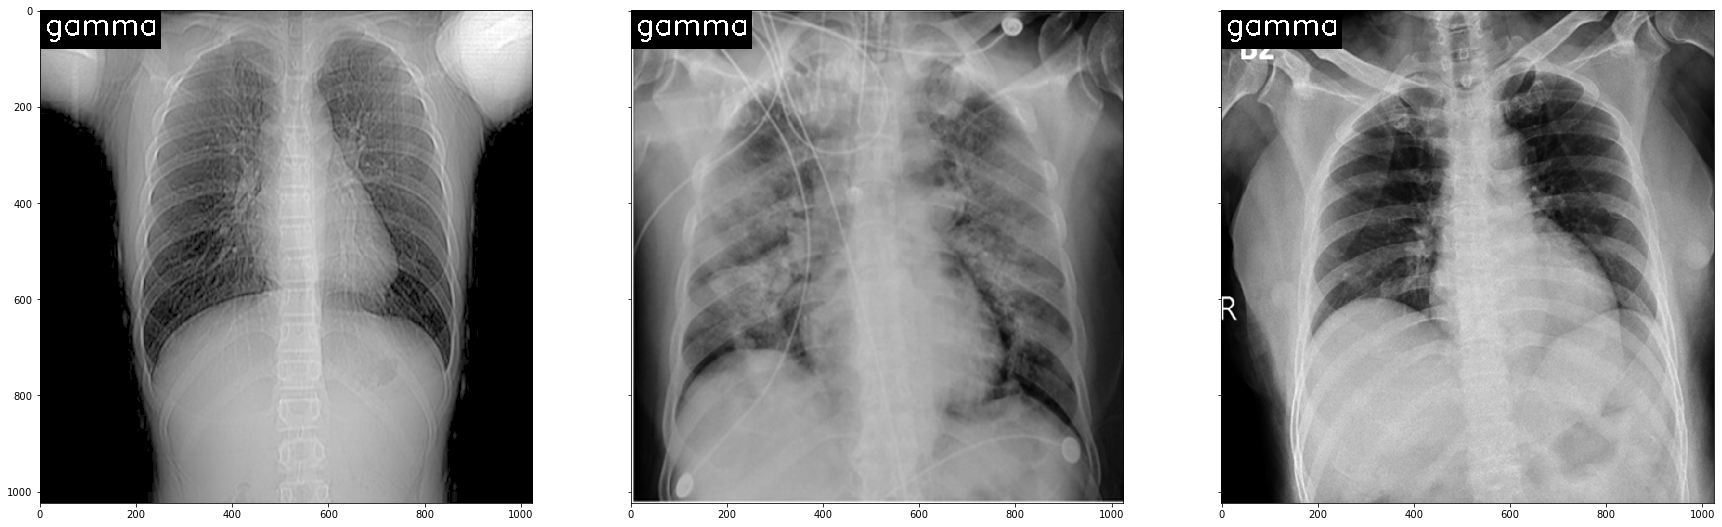

In [38]:
def gamma_trans(img, gamma):  # gamma函数处理
    gamma_table = [np.power(x / 255.0, gamma) * 255.0 for x in range(256)]  # 建立映射表
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)  # 颜色值为整数
    return cv2.LUT(img, gamma_table)  # 图片颜色查表。另外可以根据光强（颜色）均匀化原则设计自适应算法。

start = 10   # Starting index of images
num_img = 3 # Total number of images to show

fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
for q, file_path in enumerate(glob('C:/Users/28347/Documents/COVID-19/CO*')[start:start+num_img]):
    src_img = cv2.imread(file_path, 0)
    mean = np.mean(src_img)
    gamma_val = math.log10(0.5)/math.log10(mean/255) 
    image_gamma_correct = gamma_trans(src_img, gamma_val) 
    image_gamma_correct = cv2.cvtColor(image_gamma_correct, cv2.COLOR_GRAY2RGB )
    
    cv2.rectangle(image_gamma_correct, (0, 0), (250, 80), (0, 0, 0), -1)
    cv2.putText(image_gamma_correct, "gamma", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (255, 255, 255), 3)
    
    ax[q].imshow(image_gamma_correct)

## CLAHE

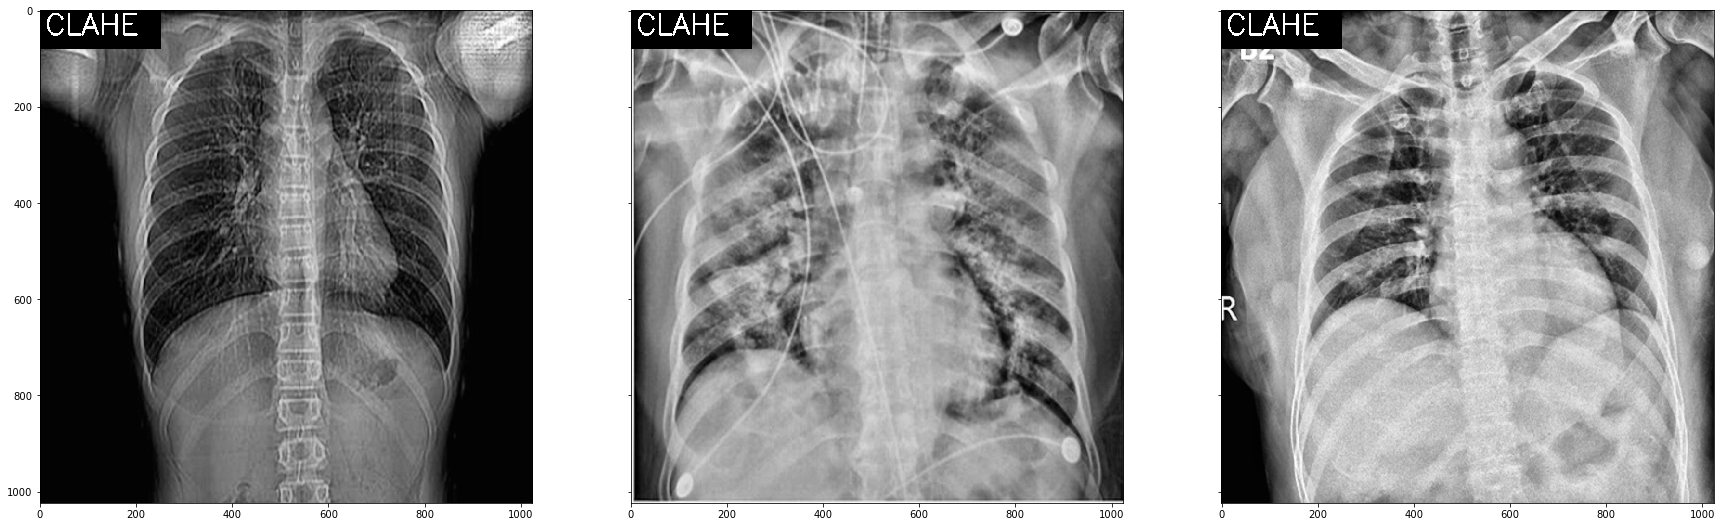

In [40]:
start = 10   # Starting index of images
num_img = 3 # Total number of images to show

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))

fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
for q, file_path in enumerate(glob('C:/Users/28347/Documents/COVID-19/CO*')[start:start+num_img]):
    src_img = cv2.imread(file_path,0)
    img_clahe = clahe.apply(src_img)

    img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_GRAY2RGB )
    
    cv2.rectangle(img_clahe, (0, 0), (250, 80), (0, 0, 0), -1)
    cv2.putText(img_clahe, "CLAHE", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (255, 255, 255), 3)
    
    ax[q].imshow(img_clahe)

## gamma+CLAHE

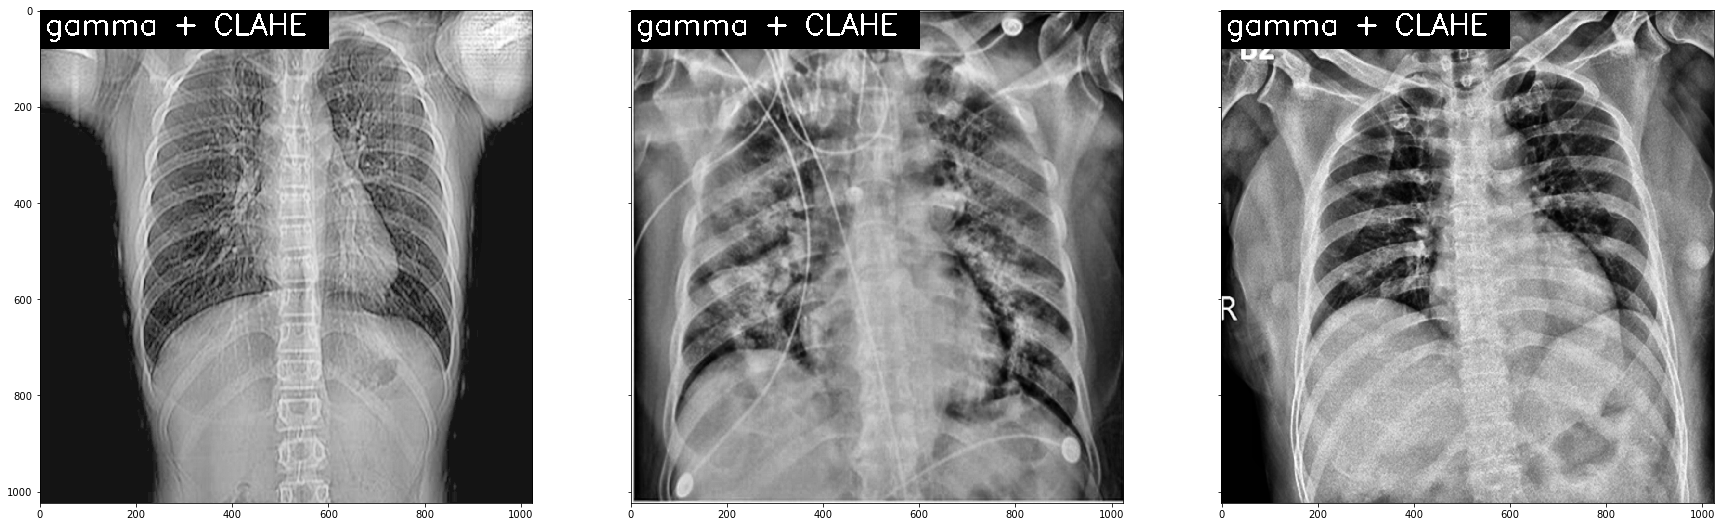

In [42]:
start = 10   # Starting index of images
num_img = 3 # Total number of images to show

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))

fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
for q, file_path in enumerate(glob('C:/Users/28347/Documents/COVID-19/CO*')[start:start+num_img]):
    src_img = cv2.imread(file_path,0)
    img_clahe = clahe.apply(src_img)
    mean = np.mean(img_clahe)
    gamma_val = math.log10(0.5)/math.log10(mean/255) 
    image_gamma_correct = gamma_trans(img_clahe, gamma_val) 
    image_gamma_correct = cv2.cvtColor(image_gamma_correct, cv2.COLOR_GRAY2RGB )
    
    cv2.rectangle(image_gamma_correct, (0, 0), (600, 80), (0, 0, 0), -1)
    cv2.putText(image_gamma_correct, "gamma + CLAHE", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (255, 255, 255), 3)
    ax[q].imshow(image_gamma_correct)

In [6]:
df = pd.read_csv('./covid-chestxray-dataset/metadata.csv')
df = df[['finding', 'folder', 'filename']]
df.head()

,finding,folder,filename
0,COVID-19,images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,images,nejmc2001573_f1a.jpeg


In [7]:
df.finding.value_counts()

COVID-19                          526
No Finding                         23
Pneumocystis                       17
Streptococcus                      17
SARS                               16
Pneumonia                          14
COVID-19, ARDS                     12
Klebsiella                          8
Mycoplasma Bacterial Pneumonia      8
Legionella                          6
Varicella                           5
Lipoid                              5
Bacterial                           4
ARDS                                4
E.Coli                              4
Chlamydophila                       2
Influenza                           2
Name: finding, dtype: int64

## merge two dataset, three classes: covid-19, normal, other viral pneumonia

In [8]:
file_names_cov =  df[df['folder'] == 'images'][(df['finding'] == 'COVID-19') | (df['finding'] == 'COVID-19, ARDS')]['filename'].values.tolist()
file_names_vir =  df[df['folder'] == 'images'][(df['finding'] == 'SARS')]['filename'].values.tolist()
file_names_nor =  df[df['folder'] == 'images'][(df['finding'] == 'No Finding')]['filename'].values.tolist()

C:\Users\28347\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\28347\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\28347\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
ROOT_PATH = "C:\\Users\\28347\\Documents"

target_path = os.path.join(ROOT_PATH, 'COVID-19')
for file_name in file_names_cov:
    file_path = os.path.join(ROOT_PATH, 'images', file_name)
    shutil.copyfile(file_path, os.path.join(target_path, file_name))

In [10]:
target_path = os.path.join(ROOT_PATH, 'Viral Pneumonia')
for file_name in file_names_vir:
    file_path = os.path.join(ROOT_PATH, 'images', file_name)
    shutil.copyfile(file_path, os.path.join(target_path, file_name))

In [11]:
target_path = os.path.join(ROOT_PATH, 'NORMAL')
for file_name in file_names_nor:
    file_path = os.path.join(ROOT_PATH, 'images', file_name)
    shutil.copyfile(file_path, os.path.join(target_path, file_name))

## for merged dataset, preprocess with gamma+CLAHE

In [26]:
target_path = os.path.join(ROOT_PATH, 'cov_processed')
os.mkdir(target_path)
for file_name in glob(os.path.join(ROOT_PATH, 'COVID-19', '*')):
    src_img = cv2.imread(file_name, 0)
    img_clahe = clahe.apply(src_img)
    mean = np.mean(img_clahe)
    gamma_val = math.log10(0.5)/math.log10(mean/255) 
    image_gamma_correct = gamma_trans(img_clahe, gamma_val) 
    image_gamma_correct = cv2.cvtColor(image_gamma_correct, cv2.COLOR_GRAY2RGB)
    image_resize = cv2.resize(image_gamma_correct, (512, 512))
    cv2.imwrite(os.path.join(target_path, file_name.split('\\')[-1]), image_resize)

In [27]:
target_path = os.path.join(ROOT_PATH, 'vir_processed')
os.mkdir(target_path)
for file_name in glob(os.path.join(ROOT_PATH, 'Viral Pneumonia', '*')):
    src_img = cv2.imread(file_name, 0)
    img_clahe = clahe.apply(src_img)
    mean = np.mean(img_clahe)
    gamma_val = math.log10(0.5)/math.log10(mean/255) 
    image_gamma_correct = gamma_trans(img_clahe, gamma_val) 
    image_gamma_correct = cv2.cvtColor(image_gamma_correct, cv2.COLOR_GRAY2RGB)
    image_resize = cv2.resize(image_gamma_correct, (512, 512))
    cv2.imwrite(os.path.join(target_path, file_name.split('\\')[-1]), image_resize)

In [29]:
target_path = os.path.join(ROOT_PATH, 'nor_processed')
os.mkdir(target_path)
for file_name in glob(os.path.join(ROOT_PATH, 'NORMAL', '*')):
    src_img = cv2.imread(file_name, 0)
    img_clahe = clahe.apply(src_img)
    mean = np.mean(img_clahe)
    gamma_val = math.log10(0.5)/math.log10(mean/255) 
    image_gamma_correct = gamma_trans(img_clahe, gamma_val) 
    image_gamma_correct = cv2.cvtColor(image_gamma_correct, cv2.COLOR_GRAY2RGB)
    image_resize = cv2.resize(image_gamma_correct, (512, 512))
    cv2.imwrite(os.path.join(target_path, file_name.split('\\')[-1]), image_resize)